# Naive Bayes 
Naive Bayes is among one of the very simple and powerful algorithms for classification based on Bayes Theorem with an assumption of independence among the predictors. The Naive Bayes classifier assumes that the presence of a feature in a class is not related to any other feature. Naive Bayes is a classification algorithm for binary and multi-class classification problems.
### -> Naive Bayes is an algorithm on top of Bayes Theorem in Probabilitity
### -> Naive Bayes is naive because it assumes that all the variables are independent

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
heart = pd.read_csv('heart.csv')

In [68]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [69]:
heart.shape

(303, 14)

In [70]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [71]:
# Missing Values
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

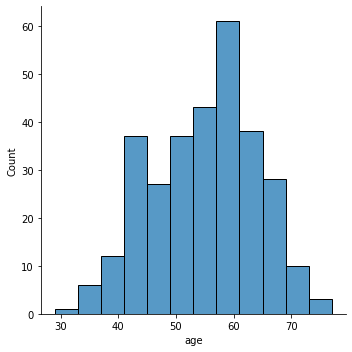

In [72]:
sns.displot(heart['age'])
plt.show()

In [73]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [74]:
heart['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [75]:
sex_key = heart['sex'].value_counts().keys()
sex_value = heart['sex'].value_counts().values

print(sex_key)
print(sex_value)

Int64Index([1, 0], dtype='int64')
[207  96]


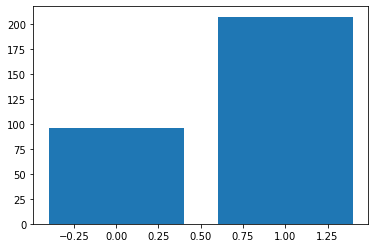

In [76]:
plt.bar(sex_key, sex_value)
plt.show()

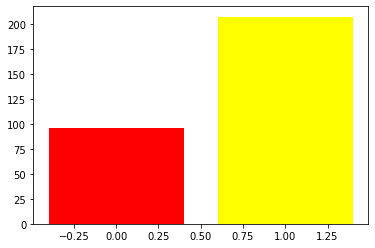

In [77]:
plt.bar(sex_key, sex_value, color = ['yellow', 'red'])
plt.show()

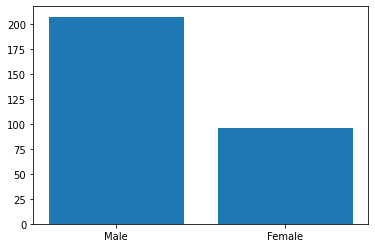

In [78]:
plt.bar(list(('Male', 'Female')), sex_value)
plt.show()

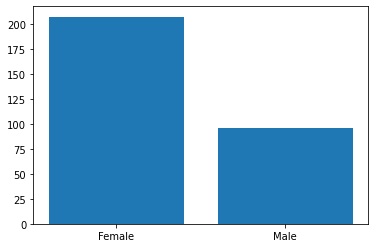

In [79]:
plt.bar(list(('Female', 'Male')), sex_value)
plt.show()

In [80]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
heart['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [82]:
cp_key = heart['cp'].value_counts().keys()
cp_value = heart['cp'].value_counts().values

print(cp_key)
print(cp_value)

Int64Index([0, 2, 1, 3], dtype='int64')
[143  87  50  23]


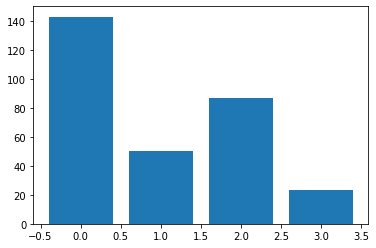

In [83]:
plt.bar(cp_key, cp_value)
plt.show()

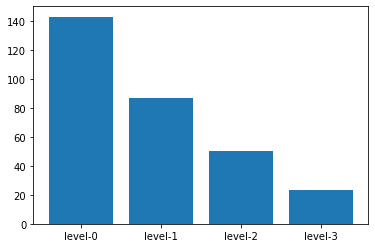

In [84]:
plt.bar(list(('level-0', 'level-1', 'level-2', 'level-3')), cp_value)
plt.show()

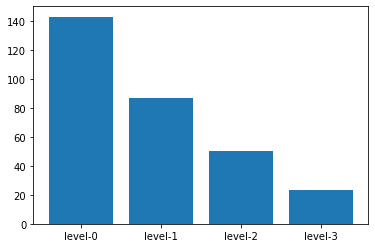

In [85]:
plt.bar(list(('level-0', 'level-1', 'level-2', 'level-3')), list(heart['cp'].value_counts()))
plt.show()

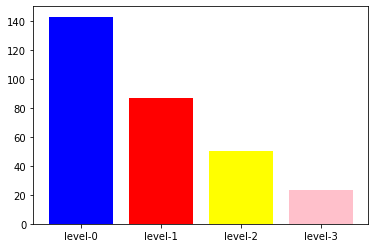

In [86]:
plt.bar(list(('level-0', 'level-1', 'level-2', 'level-3')), list(heart['cp'].value_counts()), color = ['blue', 'red', 'yellow', 'pink'])
plt.show()

In [87]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


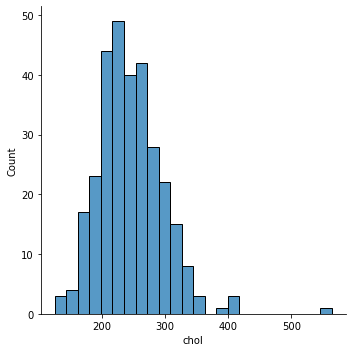

In [88]:
sns.displot(heart['chol'])
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


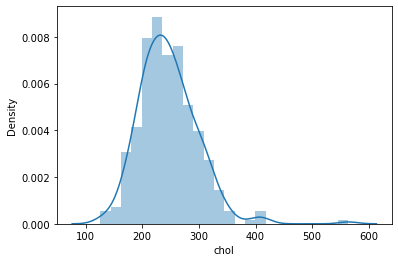

In [89]:
sns.distplot(heart['chol'])
plt.show()

In [90]:
heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

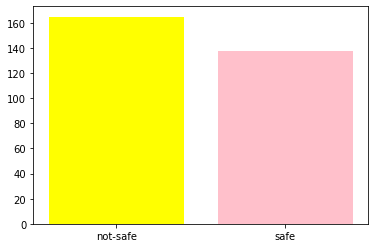

In [91]:
plt.bar(list(('not-safe', 'safe')), list(heart['target'].value_counts()), color = ['yellow', 'pink'])
plt.show()

In [95]:
x = heart[['age']]
y = heart[['target']]

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [98]:
from sklearn.naive_bayes import MultinomialNB

In [101]:
mnb = MultinomialNB()

In [100]:
mnb

MultinomialNB()

In [102]:
mnb.fit(x_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MultinomialNB()

In [104]:
y_pred = mnb.predict(x_test)

In [105]:
y_test.head(), y_pred[0: 5]

(     target
 256       0
 39        1
 130       1
 48        1
 70        1,
 array([1, 1, 1, 1, 1]))

In [106]:
from sklearn.metrics import confusion_matrix

In [108]:
confusion_matrix(y_test, y_pred)

array([[ 0, 42],
       [ 0, 49]])

In [109]:
(49) / (49 + 42)

0.5384615384615384

In [110]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [111]:
x = heart[['age', 'trestbps', 'chol']]

In [112]:
x.head()

,age,trestbps,chol
0,63,145,233
1,37,130,250
2,41,130,204
3,56,120,236
4,57,120,354


In [113]:
y = heart[['target']]

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [115]:
from sklearn.naive_bayes import GaussianNB

In [116]:
gnb = GaussianNB()

In [117]:
gnb

GaussianNB()

In [118]:
gnb.fit(x_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [120]:
y_pred = gnb.predict(x_test)

In [121]:
confusion_matrix(y_test, y_pred)

array([[24, 30],
       [18, 50]])

In [122]:
(24 + 50) / (24 + 50 + 18 + 30)

0.6065573770491803